In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

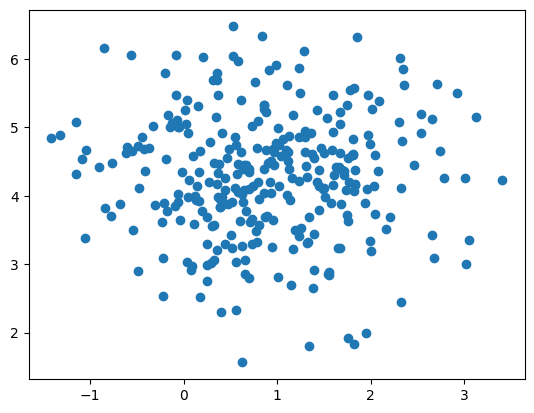

In [2]:
X, y = make_blobs(n_samples=300, centers = 1, cluster_std=0.90, random_state = 0)
plt.scatter(X[:,0], X[:,1])

In [3]:
y.shape

(300,)

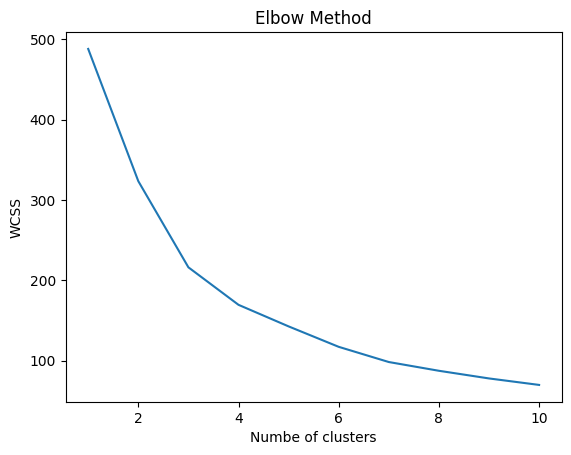

In [4]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Numbe of clusters')
plt.ylabel('WCSS')
plt.show()

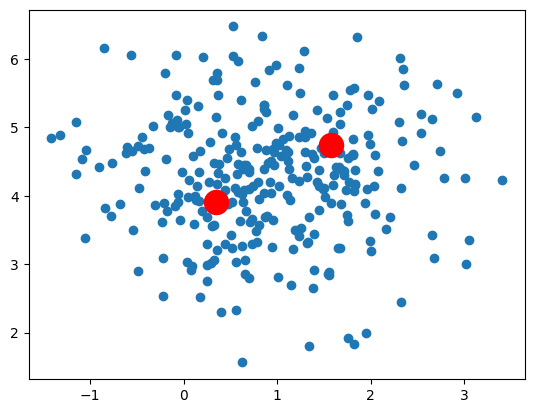

In [5]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=18, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=300, c='red')
plt.show()

In [6]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

data = pd.read_csv('/content/drive/MyDrive/Prak Big Data Analytics/Per-8/brain_size.csv', sep=';', na_values='.')


In [7]:
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [8]:
X = data.iloc[:, [2, 3]].values

In [9]:
X

array([[133, 132],
       [140, 150],
       [139, 123],
       [133, 129],
       [137, 132],
       [ 99,  90],
       [138, 136],
       [ 92,  90],
       [ 89,  93],
       [133, 114],
       [132, 129],
       [141, 150],
       [135, 129],
       [140, 120],
       [ 96, 100],
       [ 83,  71],
       [132, 132],
       [100,  96],
       [101, 112],
       [ 80,  77],
       [ 83,  83],
       [ 97, 107],
       [135, 129],
       [139, 145],
       [ 91,  86],
       [141, 145],
       [ 85,  90],
       [103,  96],
       [ 77,  83],
       [130, 126],
       [133, 126],
       [144, 145],
       [103,  96],
       [ 90,  96],
       [ 83,  90],
       [133, 129],
       [140, 150],
       [ 88,  86],
       [ 81,  90],
       [ 89,  91]])

In [10]:
X.shape

(40, 2)

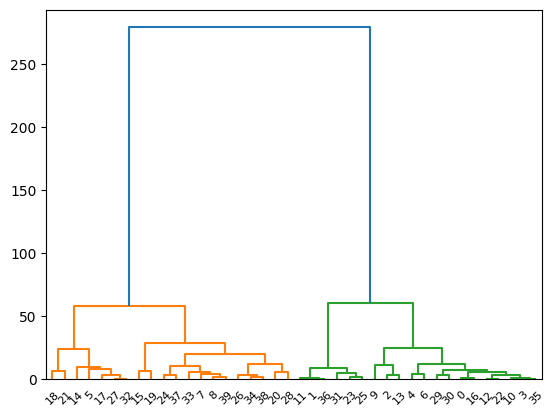

In [11]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [12]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


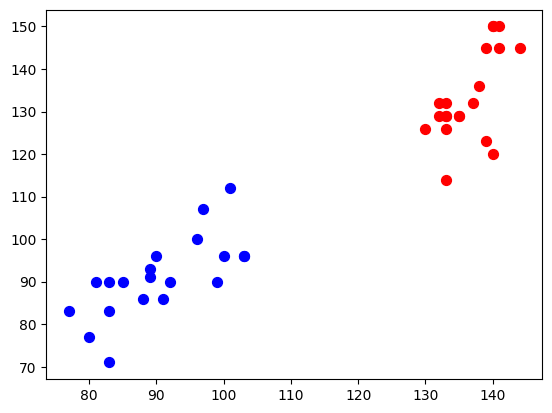

In [13]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
# plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
# plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
# plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

## Tugas Per-9

In [14]:
import pandas as pd

In [15]:

df = pd.read_csv('/content/drive/MyDrive/Prak Big Data Analytics/Per-8/brain_size.csv', sep=';', na_values='.')

In [16]:
df.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [17]:
df_columns = df.columns[[2,3]]
df_columns

Index(['FSIQ', 'VIQ'], dtype='object')

### Clustering berdasarkan MRI_Count dan VIQ

In [18]:
S = data[['PIQ', 'MRI_Count']].values
print(S[:10])

[[    124  816932]
 [    124 1001121]
 [    150 1038437]
 [    128  965353]
 [    134  951545]
 [    110  928799]
 [    131  991305]
 [     98  854258]
 [     84  904858]
 [    147  955466]]


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
S_scaled = scaler.fit_transform(S)

print(S_scaled[:10])

[[ 0.58476544 -1.28652644]
 [ 0.58476544  1.29413438]
 [ 1.75654975  1.81696657]
 [ 0.76503995  0.79299112]
 [ 1.03545171  0.59952807]
 [-0.04619534  0.28083526]
 [ 0.90024583  1.156603  ]
 [-0.58701887 -0.76355413]
 [-1.21797965 -0.05460063]
 [ 1.62134387  0.65446496]]


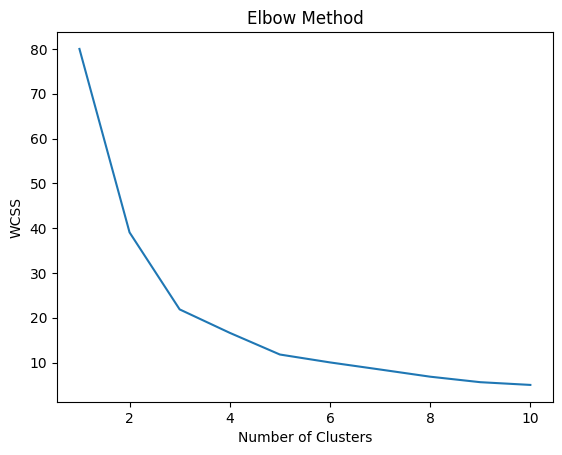

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Menghitung WCSS untuk setiap jumlah klaster dari 1 hingga 10
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(S_scaled)
    wcss.append(kmeans.inertia_)

# Memplot hasil Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


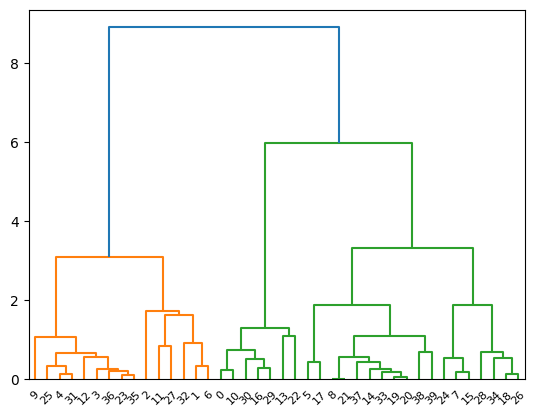

In [21]:
dendrogram = sch.dendrogram(sch.linkage(S_scaled, method='ward'))

In [34]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(S_scaled)
data_labels = model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


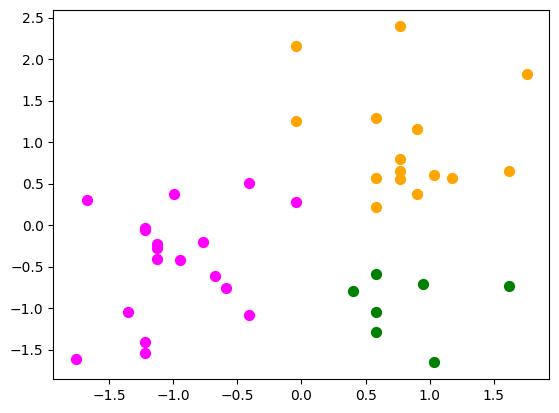

In [35]:
plt.scatter(S_scaled[data_labels==0, 0], S_scaled[data_labels==0, 1], s=50, marker='o', color='magenta')
plt.scatter(S_scaled[data_labels==1, 0], S_scaled[data_labels==1, 1], s=50, marker='o', color='orange')
plt.scatter(S_scaled[data_labels==2, 0], S_scaled[data_labels==2, 1], s=50, marker='o', color='green')
plt.show()

### Clustering dengan Weight dan Height

In [24]:
df.isnull().sum()

Unnamed: 0    0
Gender        0
FSIQ          0
VIQ           0
PIQ           0
Weight        2
Height        1
MRI_Count     0
dtype: int64

In [25]:
H = df['Height'].mean()
W = df['Weight'].mean()
print('Nilai Rerata Height:', H)
print('Nilai Rerata Weight:', W)

Nilai Rerata Height: 68.52564102564102
Nilai Rerata Weight: 151.05263157894737


In [26]:
values = {'Height':68.5, 'Weight': 151.0}
df_new = df.fillna(value=values)

In [27]:
df_new.isnull().sum()

Unnamed: 0    0
Gender        0
FSIQ          0
VIQ           0
PIQ           0
Weight        0
Height        0
MRI_Count     0
dtype: int64

In [28]:
WH = df_new[['Weight', 'MRI_Count']].values
print(WH[:10])

[[1.180000e+02 8.169320e+05]
 [1.510000e+02 1.001121e+06]
 [1.430000e+02 1.038437e+06]
 [1.720000e+02 9.653530e+05]
 [1.470000e+02 9.515450e+05]
 [1.460000e+02 9.287990e+05]
 [1.380000e+02 9.913050e+05]
 [1.750000e+02 8.542580e+05]
 [1.340000e+02 9.048580e+05]
 [1.720000e+02 9.554660e+05]]


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
WH_scaled = scaler.fit_transform(WH)

print(WH_scaled[:10])

[[-1.46362569 -1.28652644]
 [-0.00221426  1.29413438]
 [-0.35649582  1.81696657]
 [ 0.92777483  0.79299112]
 [-0.17935504  0.59952807]
 [-0.22364023  0.28083526]
 [-0.57792179  1.156603  ]
 [ 1.06063041 -0.76355413]
 [-0.75506257 -0.05460063]
 [ 0.92777483  0.65446496]]


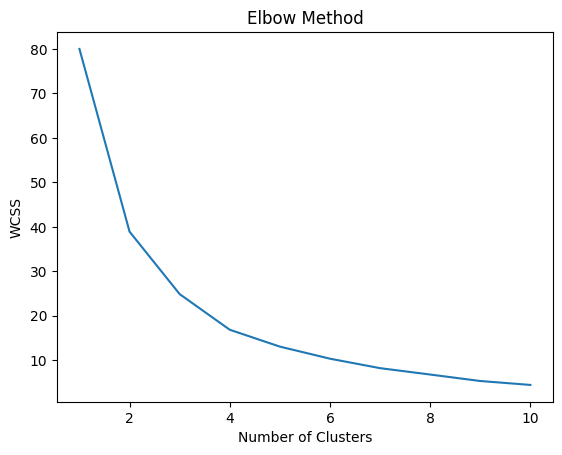

In [30]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Menghitung WCSS untuk setiap jumlah klaster dari 1 hingga 10
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(WH_scaled)
    wcss.append(kmeans.inertia_)

# Memplot hasil Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


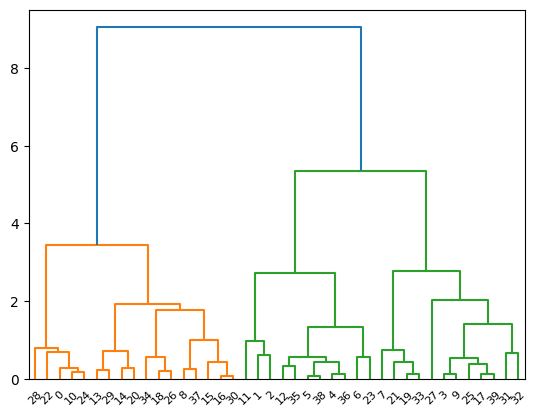

In [31]:
dendrogram = sch.dendrogram(sch.linkage(WH_scaled, method='ward'))

In [32]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(WH_scaled)
WH_labels = model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


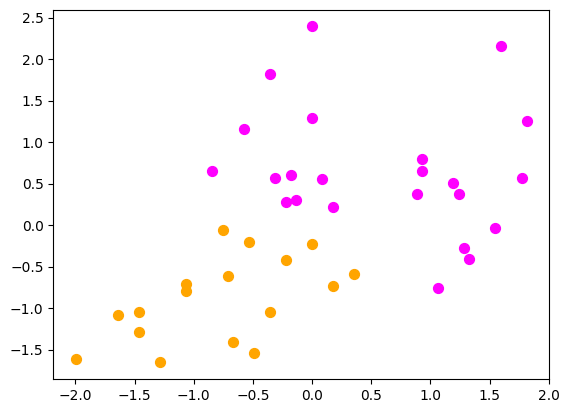

In [33]:
plt.scatter(WH_scaled[WH_labels==0, 0], WH_scaled[WH_labels==0, 1], s=50, marker='o', color='magenta')
plt.scatter(WH_scaled[WH_labels==1, 0], WH_scaled[WH_labels==1, 1], s=50, marker='o', color='orange')

plt.show()